In [2]:
# IMPORTS

In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd

In [5]:
# Import for use of Data methods
import datetime as dt
from datetime import datetime as dt


In [6]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,  inspect
from sqlalchemy import distinct
from sqlalchemy import desc
import pymysql

### Tables into SQLAlchemy ORM

In [7]:
#engine
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

#conn = engine.connect()
#session = Session(bind=conn)

In [8]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [9]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [12]:
# Inspect the table Measurement
inspector = inspect(engine)
inspector.get_table_names()
columns = inspector.get_columns('Measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [13]:
# Inspect the table Station
inspector = inspect(engine)
inspector.get_table_names()
columns = inspector.get_columns('Station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [14]:
#Explore the database file Measurement
engine.execute('SELECT * FROM Station LIMIT 10').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [15]:
#Explore the database file Measurement
engine.execute('SELECT * FROM Measurement LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

## Calculate Trip Dates

In [16]:
import datetime as dt
## My Trip dates:  4/7/2018 to 4/21/2018
start_trip = dt.date(2017,4,7)
end_trip   = dt.date(2017,4,21)

# Count the number of days of my Trip
trip_days = session.query(func.count(distinct(Measurement.date))).\
   filter(Measurement.date >= start_trip).filter(Measurement.date <= end_trip).all()
#print(f' My trip was {trip_days[0]} days long')

avg_temp = session.query(func.avg(Measurement.tobs)).\
   filter(Measurement.date >= start_trip).filter(Measurement.date <= end_trip).all()

#print(avg_temp)
print (f' My trip to Hawaii was {trip_days[0]} days long and \n the average temperature was {avg_temp[0]} while I was there')

 My trip to Hawaii was (15,) days long and 
 the average temperature was (73.62105263157895,) while I was there


# Exploratory Climate Analysis

[(19550,)]
('2017-08-23',)
 last date is 2017-08-23
 date 365 days from last is 2016-08-23


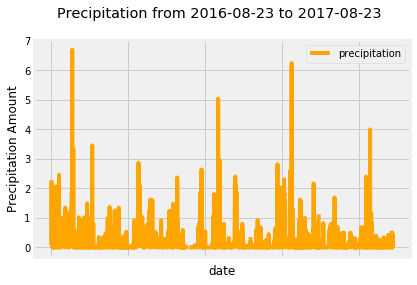

In [32]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Count the number of dates
counts = session.query(func.count(Measurement.date)).all()
print(counts)

#Identify the most recent date in the dbase file
df = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

print(df)
last = pd.Series(df)
last[0]

#Filter the Date by last 365 days from today
precip_today = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > (dt.date.today() - dt.timedelta(days=365))).\
    order_by(Measurement.date).all()

precip_today
#session.query(Measurement.date, Measurement.prcp).all()

# Calculate the date 1 year ago from the last data point in the database
last = dt.date(2017,8,23)
print(f' last date is {last}')
year_ago = last - dt.timedelta(days=365)
print(f' date 365 days from last is {year_ago}')

# Perform a query to retrieve the data and precipitation scores
precip_last = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > (year_ago)).\
    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df_precip = pd.DataFrame(precip_last)
df_precip.rename(columns={'prcp': 'precipitation'}, inplace=True)
df_precip.head()

df_precip.set_index('date', inplace=True)
# Sort the dataframe by date
df_precip.sort_index(inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
df_precip.plot(color='orange')
plt.title(f'Precipitation from {year_ago} to {last} \n')
plt.ylabel('Precipitation Amount')
plt.savefig(f'Precipitation{year_ago}_{last}.png', dpi=200)


![precipitation](Images/precipitation.png)

In [18]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_precip.precipitation.describe()

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: precipitation, dtype: float64

![describe](Images/describe.png)

In [19]:

# Design a query to show how many stations are available in this dataset?
station_counts = session.query(func.count(distinct(Measurement.station))).all()

print(f' There are {station_counts} stations')

 There are [(9,)] stations


In [20]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

# Build Alchemy without Station Name
station_freq = session.query( Measurement.station ,func.count(Measurement.station).label('station_count')).group_by(Measurement.station).order_by(desc('station_count')).all()
station_freq

# Build Alchemy with Station Name
sel = [Station.station, Station.name,func.count(Measurement.station).label('station_count') ]
same_sporder = session.query(*sel).filter(Measurement.station == Station.station).group_by(Measurement.station).order_by(desc('station_count')).all()

#Show the record results
for record in same_sporder:
    (station, station_name, num_stations) = record
    print(record)

#Turn data into a dataframe table
records = pd.DataFrame(same_sporder, columns = ['station', 'station_name', 'num_stations'])

records

('USC00519281', 'WAIHEE 837.5, HI US', 2772)
('USC00519397', 'WAIKIKI 717.2, HI US', 2724)
('USC00513117', 'KANEOHE 838.1, HI US', 2709)
('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 2669)
('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 2612)
('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 2202)
('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 1979)
('USC00517948', 'PEARL CITY, HI US', 1372)
('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 511)


,station,station_name,num_stations
0,USC00519281,"WAIHEE 837.5, HI US",2772
1,USC00519397,"WAIKIKI 717.2, HI US",2724
2,USC00513117,"KANEOHE 838.1, HI US",2709
3,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",2669
4,USC00516128,"MANOA LYON ARBO 785.2, HI US",2612
5,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",2202
6,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",1979
7,USC00517948,"PEARL CITY, HI US",1372
8,USC00518838,"UPPER WAHIAWA 874.3, HI US",511


In [21]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


print('')
station_mean = session.query( Measurement.station ,func.avg(Measurement.tobs)).group_by(Measurement.station).order_by(desc(Measurement.station)).first()
print(f'The mean temperature of the most active station {station_mean[0]} is: {station_mean[1]} (F)')

print('')
highest =  session.query( Measurement.station ,func.max(Measurement.tobs)).order_by(desc(Measurement.tobs)).first()
print(f'The highest temperature of {highest[1]} (F) was recorded from station {highest[0]}')

print('')
lowest =  session.query( Measurement.station ,func.min(Measurement.tobs)).order_by(Measurement.tobs).first()
print(f'The lowest temperation of {lowest[1]} (F) was recorded from station {lowest[0]}')



The mean temperature of the most active station USC00519523 is: 74.5436493068565 (F)

The highest temperature of 87.0 (F) was recorded from station USC00519397

The lowest temperation of 53.0 (F) was recorded from station USC00511918


('USC00519281', 2772)


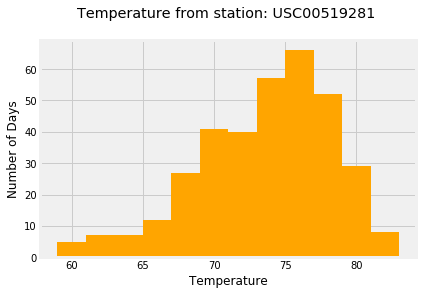

In [22]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

#identify the stattion with the most temperatures
station_temps = session.query( Measurement.station ,func.count(Measurement.tobs).label('temperatures')).group_by(Measurement.station).order_by(desc('temperatures')).all()
print(station_temps[0])

temps = session.query(Measurement.date, Measurement.tobs, Measurement.station).\
    filter(Measurement.date > (year_ago)).filter(Measurement.station == 'USC00519281').order_by(Measurement.date).all()

temps

df_temps = pd.DataFrame(temps)
df_temps.rename(columns={'tobs': 'temperature'}, inplace=True)
df_temps.head()

df_temps.hist(color='orange', bins=12)
plt.title(f'Temperature from station: {df_temps.station[0]} \n')
plt.ylabel('Number of Days')
plt.xlabel('Temperature')
plt.savefig(f'Temperatures_station_{df_temps.station[0]}.png', dpi=1)




![precipitation](Images/station-histogram.png)

In [23]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [24]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

# My trip had start and end date above
print(calc_temps(start_trip - dt.timedelta(days=365), end_trip - dt.timedelta(days=365)))

[(65.0, 73.22340425531915, 80.0)]


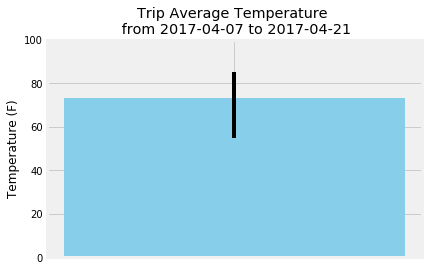

In [25]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

trip_temp = calc_temps(start_trip - dt.timedelta(days=365), end_trip - dt.timedelta(days=365))

#Turn tuple into dataframe to prep for plotting
df = pd.DataFrame(trip_temp, columns=['Min','Average','Max'])
df
df_err = df.Max - df.Min

#Plot the Trip Average Temperature as a Bar Chart
ind = " "
plt.bar(ind, df.Average, align='center', width=.2, color='skyblue')
plt.xticks(ind)
plt.ylabel('Temperature (F)')
plt.ylim([0, 100])
plt.errorbar(0,70,yerr=df_err, fmt='-',color='black')
plt.title(f'Trip Average Temperature \n from {start_trip} to {end_trip}')
plt.savefig('Trip_Avg_Temp.png')



In [26]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
ly_start = start_trip - dt.timedelta(days=365)
ly_end   = end_trip   - dt.timedelta(days=365)

#Built Query without merging with Station DB
station_temps = session.query(func.sum(Measurement.prcp), Measurement.station).\
    filter(Measurement.date >= ly_start). filter(Measurement.date <= end_trip).group_by(Measurement.station).\
    order_by(Measurement.date).all()

#Query that merges the tables and identifies the station name and station DB data with Measurement table
station_temps
sel = [func.sum(Measurement.prcp).label('sum_precip'), Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation]
same_sporder = session.query(*sel).filter(Measurement.station == Station.station).\
filter(Measurement.date >= ly_start). filter(Measurement.date <= end_trip).group_by(Measurement.station).order_by(desc('sum_precip')).all()

#Show the record results
for record in same_sporder:
    (sum_precip, station, station_name, latitude, longitude, elevation) = record
    print(record)

#Turn data into a dataframe table
records = pd.DataFrame(same_sporder, columns = ['sum_precip', 'station', 'station_name', 'latitude', 'longitude', 'elevation'])

records

(182.2499999999999, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)
(97.93000000000009, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9)
(63.180000000000035, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6)
(42.669999999999995, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5)
(32.71, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0)
(22.200000000000003, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)
(6.19, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)


,sum_precip,station,station_name,latitude,longitude,elevation
0,182.25,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
1,97.93,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
2,63.18,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
3,42.67,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
4,32.71,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
5,22.20,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
6,6.19,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9


## Optional Challenge Assignment

In [27]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
#daily_normals("01-01")
daily_normals("04-07")

[(63.0, 71.10526315789474, 78.0)]

In [28]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
days = end_trip - start_trip
print(days)

my_start = '2018-04-07'
my_end   = '2018-04-21'
# Use the start and end date to create a range of dates
mydates = pd.date_range(my_start, my_end).tolist()
mydates

dates = pd.DataFrame(mydates, columns=['date'])
dates

# Stip off the year and save a list of %m-%d strings
dates['new_date'] =dates['date'].map(lambda x: x.strftime("%m-%d"))

# df =dates.astype( {"new_date": "str"},copy=False, errors='ignore')
# df.dtypes
# print(isinstance(df.new_date, str))
dates

14 days, 0:00:00


,date,new_date
0,2018-04-07,04-07
1,2018-04-08,04-08
2,2018-04-09,04-09
3,2018-04-10,04-10
4,2018-04-11,04-11
5,2018-04-12,04-12
6,2018-04-13,04-13
7,2018-04-14,04-14
8,2018-04-15,04-15
9,2018-04-16,04-16


In [29]:
#Loop through the list of %m-%d strings and calculate the normals for each date
normals = []
for day in dates.new_date:
    normals.append(daily_normals(str(day)))
print(normals)



[[(63.0, 71.10526315789474, 78.0)], [(66.0, 72.10526315789474, 77.0)], [(62.0, 71.6140350877193, 78.0)], [(64.0, 71.40350877192982, 79.0)], [(65.0, 72.49180327868852, 82.0)], [(65.0, 72.22413793103448, 80.0)], [(64.0, 71.52542372881356, 79.0)], [(65.0, 72.75, 81.0)], [(61.0, 71.79310344827586, 79.0)], [(62.0, 71.55357142857143, 81.0)], [(65.0, 71.93103448275862, 77.0)], [(67.0, 72.49152542372882, 77.0)], [(65.0, 72.42105263157895, 83.0)], [(64.0, 72.73684210526316, 80.0)], [(66.0, 72.32142857142857, 78.0)]]


In [30]:
# Load the query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
normals = pd.read_csv('temps.csv')
normals.new_date = pd.to_datetime(normals.new_date)
normals.set_index('new_date',inplace=True)


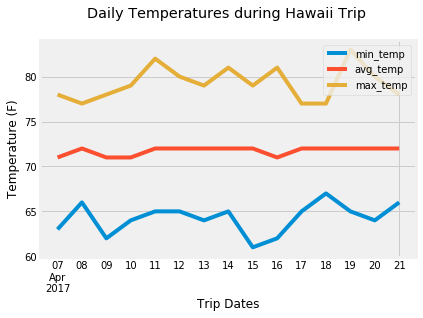

In [31]:
# Plot the daily normals as an area plot

normals.plot(stacked=False)
plt.xlabel('Trip Dates')
plt.ylabel('Temperature (F)')
plt.title('Daily Temperatures during Hawaii Trip \n')
plt.savefig('Daily_Temps_during_Hawaii_Trip.png')


